In [1]:
#%pip install scipy
#%pip install seaborn

import numpy as np
from typing import Tuple
from scipy.stats import mode
from sklearn.metrics import confusion_matrix
import seaborn as sns
csv_path = "iris.csv"

Load data and clean, try loading without shuffle

In [2]:
def load_csv(csv_path:str) -> Tuple[np.ndarray,np.ndarray]:
    np.random.seed(42)
    dataset = np.genfromtxt(csv_path,delimiter=',')
    np.random.shuffle(dataset,)
    x,y = dataset[:,:4],dataset[:,-1]
    return x,y

In [3]:
x,y = load_csv(csv_path)
x,y

(array([[ 6.100e+00,  2.800e+00,  4.700e+00,  1.200e+00],
        [ 5.700e+00,  3.800e+00,  1.700e+00,  3.000e-01],
        [ 7.700e+00,  2.600e+00,  6.900e+00,  2.300e+00],
        [ 6.000e+00,  2.900e+00,  4.500e+00,  1.500e+00],
        [ 6.800e+00,  2.800e+00, -1.111e+03,  1.400e+00],
        [ 5.400e+00,  3.400e+00,  1.500e+00,  4.000e-01],
        [ 5.600e+00,  2.900e+00,  3.600e+00,  1.300e+00],
        [ 6.900e+00,  3.100e+00,  5.100e+00,  2.300e+00],
        [ 6.200e+00,  2.200e+00,  4.500e+00,  1.500e+00],
        [ 5.800e+00,  2.700e+00,  3.900e+00,  1.200e+00],
        [ 6.500e+00,  3.200e+00,  5.100e+00,  2.000e+00],
        [ 4.800e+00,  3.000e+00,  1.400e+00,  1.000e-01],
        [ 5.500e+00,  3.500e+00,        nan,  2.000e-01],
        [ 4.900e+00,  3.100e+00,  1.500e+00,  1.000e-01],
        [ 5.100e+00,  1.000e+02,  1.500e+00,  3.000e-01],
        [ 6.300e+00,  3.300e+00,  4.700e+00,  1.600e+00],
        [ 6.500e+00,  3.000e+00,  5.800e+00,  2.200e+00],
        [ 5.60

In [4]:
np.mean(x,axis=0),np.var(x, axis=0)

(array([nan, nan, nan, nan]), array([nan, nan, nan, nan]))

In [5]:
np.nanmean(x,axis=0),np.nanvar(x, axis=0) 

(array([ 355.46503497, -280.09189189,    2.95      ,   21.74726027]),
 array([1.73561968e+07, 1.18405444e+07, 1.51049922e+04, 6.11729208e+04]))

In [6]:
x[np.isnan(x)] = 3.5

In [7]:
(x>10.0).sum(),(x<0.0).sum()

(4, 2)

In [8]:
np.sum(np.logical_or(x>10.0,x<0.0))

6

In [9]:
x[np.where(np.logical_or(x>10.0,x<0.0))]

array([ -1111.,    100.,   1000.,  50000.,   3000., -42000.])

In [14]:
less_then = np.where(x<0.0)
higher_then = np.where(x>10.0)
less_then,higher_then

((array([  4, 140]), array([2, 1])),
 (array([14, 27, 28, 62]), array([1, 2, 0, 3])))

In [10]:
y = np.delete(y,np.where(x<0.0)[0],axis=0)
x = np.delete(x,np.where(x>10.0)[0],axis=0)
y = np.delete(y,np.where(x>10.0)[0],axis=0)
x = np.delete(x,np.where(x<0.0)[0],axis=0)
x.shape,y.shape

((144, 4), (148,))

Train test split try optim

In [12]:
def train_test_split(features:np.ndarray,
                      labels:np.ndarray,
                      test_split_ratio:float) -> None:
    test_size = int(len(features) * test_split_ratio)
    train_size = len(features) - test_size
    assert len(features) == test_size + train_size, "size mismatch!"
    x_train,y_train = features[:train_size,:],labels[:train_size]
    x_test,y_test = features[train_size:,:],labels[train_size:]
    return (x_train,y_train,x_test,y_test)

Distance

In [18]:
x_train,y_train,x_test,y_test = train_test_split(x,y,0.2)
x_train,y_train,x_test,y_test 

(array([[6.1, 2.8, 4.7, 1.2],
        [5.7, 3.8, 1.7, 0.3],
        [7.7, 2.6, 6.9, 2.3],
        [6. , 2.9, 4.5, 1.5],
        [5.4, 3.4, 1.5, 0.4],
        [5.6, 2.9, 3.6, 1.3],
        [6.9, 3.1, 5.1, 2.3],
        [6.2, 2.2, 4.5, 1.5],
        [5.8, 2.7, 3.9, 1.2],
        [6.5, 3.2, 5.1, 2. ],
        [4.8, 3. , 1.4, 0.1],
        [5.5, 3.5, 3.5, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [6.3, 3.3, 4.7, 1.6],
        [6.5, 3. , 5.8, 2.2],
        [5.6, 2.5, 3.9, 1.1],
        [3.5, 2.8, 4.5, 3.5],
        [6.4, 3.5, 5.6, 2.2],
        [4.7, 3.2, 1.6, 0.2],
        [6.1, 3. , 4.9, 1.8],
        [5. , 3.4, 1.6, 0.4],
        [6.4, 2.8, 5.6, 2.1],
        [7.9, 3.8, 6.4, 2. ],
        [6.7, 3. , 5.2, 2.3],
        [6.7, 2.5, 5.8, 1.8],
        [4.8, 3.1, 1.6, 0.2],
        [4.6, 3.6, 1. , 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [6.7, 3.1, 4.4, 1.4],
        [3.5, 3.4, 1.6, 0.2],
        [4.4, 3.2, 1.3, 0.2],
        [6.3, 2.5, 5. , 1.9],
        [6.4, 3.2, 4.5, 1.5],
        [5

Distance

In [15]:
def euclidean(points:np.ndarray,element_of_x:np.ndarray):
    return np.sqrt(np.sum((points-element_of_x)**2,axis=1))

Predict func

In [17]:
for x_test_element in x_test:
        distances = euclidean(x_train,x_test_element)
        distances = np.array(sorted(zip(distances,y_train)))
        print(distances)

[[0.6244998  1.        ]
 [0.71414284 2.        ]
 [0.78102497 2.        ]
 [0.79372539 0.        ]
 [0.83666003 0.        ]
 [0.91104336 2.        ]
 [0.91104336 0.        ]
 [0.91651514 1.        ]
 [0.92736185 2.        ]
 [0.93808315 0.        ]
 [0.93808315 0.        ]
 [0.97467943 2.        ]
 [1.03923048 0.        ]
 [1.10905365 0.        ]
 [1.12694277 1.        ]
 [1.22882057 1.        ]
 [1.2489996  2.        ]
 [1.27279221 0.        ]
 [1.2922848  0.        ]
 [1.3        2.        ]
 [1.3114877  0.        ]
 [1.34164079 2.        ]
 [1.3453624  0.        ]
 [1.34907376 1.        ]
 [1.36747943 1.        ]
 [1.4        2.        ]
 [1.40712473 0.        ]
 [1.43874946 0.        ]
 [1.4832397  1.        ]
 [1.51986842 0.        ]
 [1.64620776 1.        ]
 [1.67928556 1.        ]
 [1.72626765 1.        ]
 [1.83847763 2.        ]
 [1.95192213 1.        ]
 [1.96214169 0.        ]
 [1.98242276 2.        ]
 [2.15174348 2.        ]
 [2.17715411 1.        ]
 [2.38117618 0.        ]


In [8]:
def predict(x_train,y_train,x_test,k:int) -> np.ndarray:
    labels_pred=[]
    for x_test_element in x_test:
        distances = euclidean(x_train,x_test_element)
        distances = np.array(sorted(zip(distances,y_train)))
        label_pred = mode(distances[:k,1],keepdims=False).mode
        labels_pred.append(label_pred)
    return np.array(labels_pred,dtype=np.int32)

In [14]:
predict(x_train,y_train,x_test,k=3)

array([0, 0, 1, 1, 0, 1, 2, 2, 0, 1, 2, 2, 0, 0, 0, 1, 2, 2, 1, 2, 1, 1,
       0, 2, 0, 1, 1, 0, 1, 2], dtype=int32)

Metrics

In [15]:
def accuracy(y_test:np.ndarray,y_preds:np.ndarray) -> float:
    true_positive = (y_test == y_preds).sum()
    return true_positive / len(y_test) * 100


In [16]:
def plot_confusion_matrix(y_test:np.ndarray,y_preds:np.ndarray):
        conf_matrix = confusion_matrix(y_test,y_preds)
        sns.heatmap(conf_matrix,annot=True) 

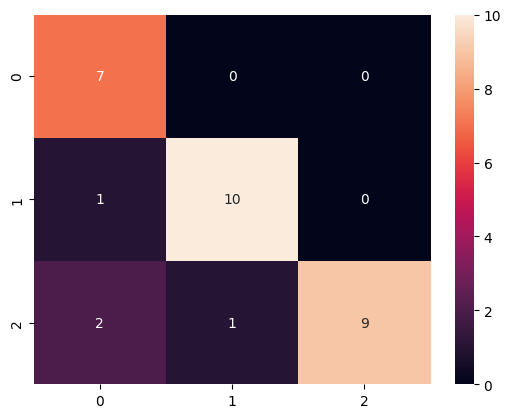

In [17]:
plot_confusion_matrix(y_test,
                      y_preds = predict(x_train,y_train,x_test,k=3))

In [18]:
print(x_train)

[[ 6.100e+00  2.800e+00  4.700e+00  1.200e+00]
 [ 5.700e+00  3.800e+00  1.700e+00  3.000e-01]
 [ 7.700e+00  2.600e+00  6.900e+00  2.300e+00]
 [ 6.000e+00  2.900e+00  4.500e+00  1.500e+00]
 [ 6.800e+00  2.800e+00 -1.111e+03  1.400e+00]
 [ 5.400e+00  3.400e+00  1.500e+00  4.000e-01]
 [ 5.600e+00  2.900e+00  3.600e+00  1.300e+00]
 [ 6.900e+00  3.100e+00  5.100e+00  2.300e+00]
 [ 6.200e+00  2.200e+00  4.500e+00  1.500e+00]
 [ 5.800e+00  2.700e+00  3.900e+00  1.200e+00]
 [ 6.500e+00  3.200e+00  5.100e+00  2.000e+00]
 [ 4.800e+00  3.000e+00  1.400e+00  1.000e-01]
 [ 5.500e+00  3.500e+00        nan  2.000e-01]
 [ 4.900e+00  3.100e+00  1.500e+00  1.000e-01]
 [ 5.100e+00  1.000e+02  1.500e+00  3.000e-01]
 [ 6.300e+00  3.300e+00  4.700e+00  1.600e+00]
 [ 6.500e+00  3.000e+00  5.800e+00  2.200e+00]
 [ 5.600e+00  2.500e+00  3.900e+00  1.100e+00]
 [       nan  2.800e+00  4.500e+00        nan]
 [ 6.400e+00        nan  5.600e+00  2.200e+00]
 [ 4.700e+00  3.200e+00  1.600e+00  2.000e-01]
 [ 6.100e+00 